In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [217]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import pylab as pl
import geopandas as gpd
import folium
from folium import plugins

ModuleNotFoundError: No module named 'geopandas'

In [222]:

plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})

In [3]:
cities = pd.read_csv('../data/cities.csv')
lines = pd.read_csv('../data/lines.csv')
stations = pd.read_csv('../data/stations.csv')
systems = pd.read_csv('../data/systems.csv')
station_lines = pd.read_csv('../data/station_lines.csv')
track_lines = pd.read_csv('../data/track_lines.csv')
tracks = pd.read_csv('../data/tracks.csv')

In [4]:
cities.head()

,id,name,coords,start_year,url_name,country,country_state
0,5,Aberdeen,POINT(-2.15 57.15),2017.0,aberdeen,Scotland,NaN
1,6,Adelaide,POINT(138.6 -34.91666667),2017.0,adelaide,Australia,NaN
2,7,Algiers,POINT(3 36.83333333),2017.0,algiers,Algeria,NaN
3,9,Ankara,POINT(32.91666667 39.91666667),2017.0,ankara,Turkey,NaN
4,16,Belém,POINT(-48.48333333 -1.466666667),2017.0,belem,Brazil,NaN


In [5]:
lines.head()

,id,city_id,name,url_name,color,system_id,transport_mode_id
0,43,4,Línea 2,43-linea-2,#ffbe2e,267,4.0
1,75,34,Línea 3 Metro de Caracas,75-linea-3-metro-de-caracas,#000,119,NaN
2,107,126,Línea 1,107-linea-1,#434343,249,NaN
3,604,74,La navette,604-la-navette,#009ab9,346,NaN
4,61,66,Línea 1 (Tramo 1A),61-linea-1,#49aa43,250,NaN


In [6]:
stations.head()

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74


In [7]:
tracks.head()

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118


In [10]:
track_lines.head()


,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48


In [11]:
station_lines.head()

,id,station_id,line_id,city_id,created_at,updated_at
0,47,7754,570,74,2017-11-21 00:00:00,2017-11-21 00:00:00
1,48,7771,571,74,2017-11-21 00:00:00,2017-11-21 00:00:00
2,49,7764,571,74,2017-11-21 00:00:00,2017-11-21 00:00:00
3,50,7763,571,74,2017-11-21 00:00:00,2017-11-21 00:00:00
4,51,7729,571,74,2017-11-21 00:00:00,2017-11-21 00:00:00


In [16]:
systems.head()

,id,city_id,name
0,1,5,NaN
1,2,6,NaN
2,3,7,NaN
3,4,8,NaN
4,5,9,NaN


In [55]:
cities_tracks = cities.merge(tracks, how='inner', left_on='id', right_on='city_id')

In [56]:
cities_tracks.head()

,id_x,name,coords,start_year,url_name,country,country_state,id_y,geometry,buildstart,opening,closure,length,city_id
0,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.,4893,"LINESTRING(-87.6337015470323 41.8755914840214,...",1895.0,1895.0,1958.0,9451,147
1,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.,4894,"LINESTRING(-87.7449583 41.8725646,-87.7548059 ...",1905.0,1905.0,1958.0,818,147
2,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.,4896,"LINESTRING(-87.8827459601093 41.880327150266,-...",1926.0,1926.0,1951.0,3515,147
3,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.,1982,"LINESTRING(-87.7131606 41.9664862,-87.713166 4...",0.0,1907.0,999999.0,180,147
4,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.,1973,"LINESTRING(-87.6536417 41.9428291,-87.653729 4...",0.0,1907.0,999999.0,5571,147


In [57]:
cities_tracks.drop(columns=['country_state', 'id_x'], inplace=True)
cities_tracks.rename(columns={'id_y': 'track_id'}, inplace=True)
cities_tracks.head()

,name,coords,start_year,url_name,country,track_id,geometry,buildstart,opening,closure,length,city_id
0,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,4893,"LINESTRING(-87.6337015470323 41.8755914840214,...",1895.0,1895.0,1958.0,9451,147
1,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,4894,"LINESTRING(-87.7449583 41.8725646,-87.7548059 ...",1905.0,1905.0,1958.0,818,147
2,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,4896,"LINESTRING(-87.8827459601093 41.880327150266,-...",1926.0,1926.0,1951.0,3515,147
3,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,1982,"LINESTRING(-87.7131606 41.9664862,-87.713166 4...",0.0,1907.0,999999.0,180,147
4,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,1973,"LINESTRING(-87.6536417 41.9428291,-87.653729 4...",0.0,1907.0,999999.0,5571,147


In [37]:
track_length = cities_tracks.groupby('country').agg({'length': 'sum'})

,length
country,
Argentina,1472481
Australia,426050
Austria,156087
Bolivia,33640
Brazil,1018246
Canada,775250
Chile,623819
China,1650882
Colombia,173514


In [38]:
cities_tracks['country'].nunique()

26

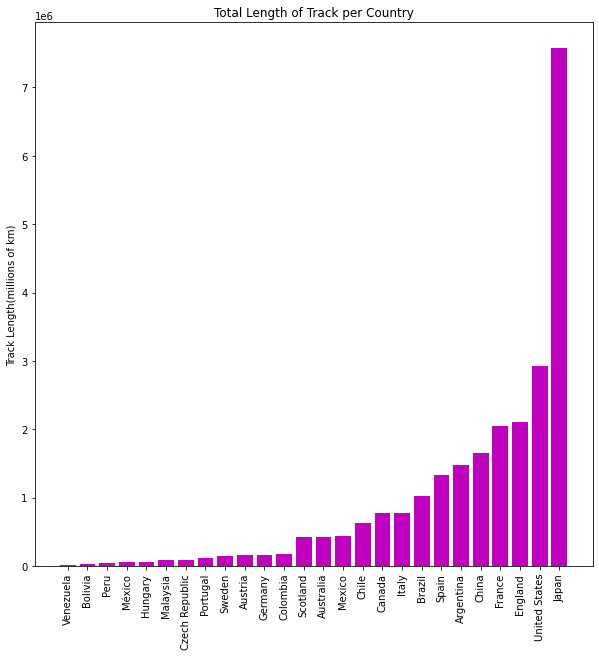

In [146]:
fig, ax = plt.subplots(figsize=(10,10))
track_length = cities_tracks.groupby('country').agg({'length': 'sum'}).reset_index().sort_values(by='length')
x=track_length['country']
ax.bar(x, track_length['length'], color='m')
plt.setp(ax.get_xticklabels(), rotation=90, ha="center")
ax.set_title('Total Length of Track per Country')
ax.set_ylabel('Track Length(millions of km)');

fig.savefig('../images/length_track_bar.png')

In [193]:
track_length = cities_tracks.groupby('country').agg({'length': 'sum'}).reset_index().sort_values(by='length')
south_america = track_length[(track_length['country'] == 'Venezuela') | (track_length['country'] == 'Bolivia')
            | (track_length['country'] == 'Peru') | (track_length['country'] == 'Colombia')
            | (track_length['country'] == 'Chile') | (track_length['country'] == 'Argentina')
            | (track_length['country'] == 'Brazil')]
# [0,1,2,11, 15, 18, 20]

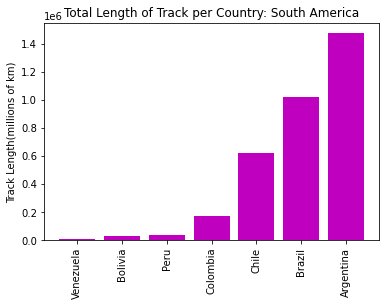

In [198]:
fig, ax = plt.subplots()

x=south_america['country']
ax.bar(x, south_america['length'], color='m')
plt.setp(ax.get_xticklabels(), rotation=90, ha="center")
ax.set_title('Total Length of Track per Country: South America')
ax.set_ylabel('Track Length(millions of km)');

fig.savefig('../images/length_track_bar_2.png', bbox_inches='tight')

In [100]:
cities_stations = cities.merge(stations, how='inner', left_on='id', right_on='city_id')
cities_stations.head()

,id_x,name_x,coords,start_year,url_name,country,country_state,id_y,name_y,geometry,buildstart,opening,closure,city_id
0,211,Ottawa,POINT(-75.71666667 45.4),2000.0,ottawa,Canada,Ont.,8421,Carling,POINT(-75.7095199715726 45.397399937456),2000.0,2001.0,999999.0,211
1,211,Ottawa,POINT(-75.71666667 45.4),2000.0,ottawa,Canada,Ont.,8422,Bayview,POINT(-75.721629884714 45.4089954402401),2000.0,2001.0,999999.0,211
2,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.,6324,Kedzie,POINT(-87.7095589 41.9661285),0.0,1907.0,999999.0,147
3,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.,6317,Irving Park,POINT(-87.6749332 41.9543516),0.0,1907.0,999999.0,147
4,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.,6368,Grand,POINT(-87.6356481487934 41.8916007945802),0.0,1921.0,1970.0,147


In [98]:
cities_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15794 entries, 0 to 15793
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       15794 non-null  object 
 1   coords        15794 non-null  object 
 2   start_year    15794 non-null  float64
 3   url_name      15794 non-null  object 
 4   country       15794 non-null  object 
 5   station_id    15794 non-null  int64  
 6   station_name  14248 non-null  object 
 7   geometry      15794 non-null  object 
 8   buildstart    14342 non-null  float64
 9   opening       15721 non-null  float64
 10  closure       15713 non-null  float64
 11  city_id       15794 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 1.6+ MB


In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))
# station_open = cities_stations.groupby(cities_stations['country'] == 'Japan').reset_index()
# x=station_open[station_open['country'] == 'Japan']
# ax.bar(x, track_length['length'], color='m')
# plt.setp(ax.get_xticklabels(), rotation=90, ha="center")
# ax.set_title('Total Length of Track per Country')
# ax.set_ylabel('Track Length(millions of km)');

# fig.savefig('../images/length_track_bar.png')

In [109]:
cities_stations[['country', 'opening']].groupby('country').count()

,opening
country,
Argentina,675
Australia,109
Austria,306
Belgium,4
Bolivia,42
Brazil,353
Canada,218
Chile,462
China,705


In [210]:
start_ = cities_stations[['country', 'name_y']].groupby('country').count()['name_y']
start_.head(50)

country
Argentina          684
Australia          113
Austria            306
Belgium              4
Bolivia             34
Brazil             377
Canada             218
Chile              446
China               33
Colombia            37
Czech Republic      46
England            261
France            2742
Germany            384
Hungary             59
Italy              422
Japan             4613
Malaysia            37
Mexico             467
México              20
Netherlands          2
Peru                31
Portugal             7
Scotland           157
Spain              726
Sweden              25
United States     1994
Venezuela            3
Name: name_y, dtype: int64

In [213]:
# start_ = cities_stations[['country', 'name_y', 'start_year']].groupby(['country', 'name_y', 'start_year']).count()


In [212]:
# fig, ax = plt.subplots()
# x = start_['start_year']
# y = start_
# ax.scatter(x, y)

In [211]:
#trying to make a map

In [215]:
brazil_lines=lines[lines.city_id==106]
brazil_tracks_lines=track_lines[track_lines.city_id==106]
brazil_tracks=tracks[tracks.city_id==106].drop(columns=['buildstart','opening','closure','city_id'])
brazil_tracks.columns=['section_id','geometry','length']
brazil_track_lines=pd.merge(brazil_tracks_lines,brazil_tracks)
brazil_track_lines=brazil_track_lines.drop(columns=['id','created_at','updated_at','city_id'])
brazil_track_lines.columns=['section_id','id','geometry','length']
brazil_lines=pd.merge(brazil_track_lines,brazil_lines)
brazil_stations=stations[stations['city_id']==106]
brazil_stations.head()

,id,name,geometry,buildstart,opening,closure,city_id
429,3533,Varginha,POINT(-46.7147879308226 -23.76661726739),2013.0,NaN,999999.0,106
430,6638,Mendes,POINT(-46.7067964380596 -23.7485930477133),2013.0,NaN,999999.0,106
456,6643,Aeroporto,POINT(-46.4928078074659 -23.4326400933044),2013.0,2018.0,999999.0,106
466,6639,Vila Sônia,POINT(-46.7321441270932 -23.5921294325874),2016.0,NaN,999999.0,106
467,6642,Engenheiro Goulart,POINT(-46.520474164089 -23.4977495080526),2013.0,2017.0,999999.0,106


In [231]:
dc_lines=lines[lines.city_id==252]
dc_tracks_lines=track_lines[track_lines.city_id==252]
dc_tracks=tracks[tracks.city_id==252].drop(columns=['buildstart','opening','closure','city_id'])
dc_tracks.columns=['section_id','geometry','length']
dc_track_lines=pd.merge(dc_tracks_lines,dc_tracks)
dc_track_lines=dc_track_lines.drop(columns=['id','created_at','updated_at','city_id'])
dc_track_lines.columns=['section_id','id','geometry','length']
dc_lines=pd.merge(dc_track_lines,dc_lines)
dc_stations=stations[stations['city_id']==252]
dc_stations.head()

,id,name,geometry,buildstart,opening,closure,city_id
2512,3879,Stadium Armory,POINT(-76.9771250586785 38.8856927844845),0.0,1977.0,999999.0,252
2545,4019,Prince George's Plaza,POINT(-76.9561172356616 38.9656944823944),2012.0,2012.0,999999.0,252
2552,4014,Fort Totten,POINT(-77.0021607535287 38.9520857175255),1999.0,1999.0,999999.0,252
2562,4022,Van Dorn Street,POINT(-77.1295325256555 38.7987016974937),2012.0,2012.0,999999.0,252
2563,3997,L'Enfant Plaza,POINT(-77.021907065384 38.8855456652065),2014.0,2014.0,999999.0,252


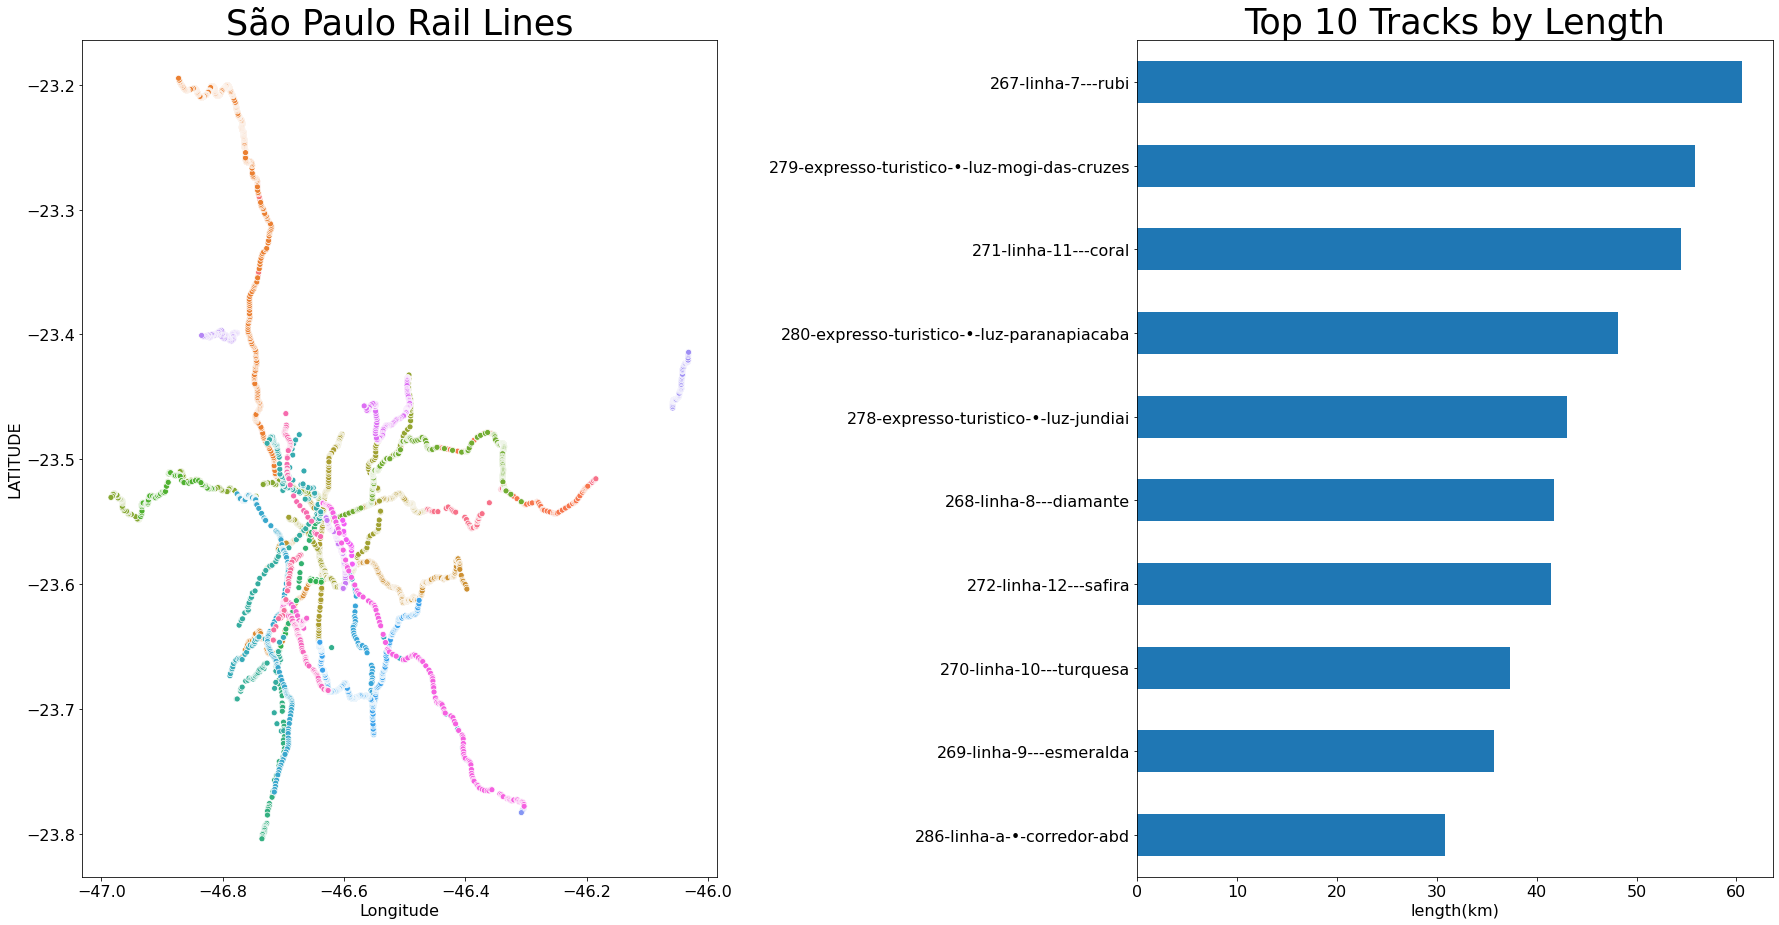

In [237]:
x=[]
y=[]
z=[]
for i in range(len(brazil_lines)):
    sp=brazil_lines.iloc[i].geometry.split('(')[1].split(')')[0].split(',')
    for j in range(len(sp)):
        x.append(sp[j].split(' ')[0])
        y.append(sp[j].split(' ')[1])
        z.append(brazil_lines.url_name[i])
fix=pd.DataFrame({'x':x,'y':y,'z':z})
fix['x']=fix['x'].astype(float)
fix['y']=fix['y'].astype(float)
plt.figure(figsize=(25, 25))
plt.subplot(2, 2, 1) 
ax=sns.scatterplot(x="x", y="y", hue="z",data=fix)
plt.legend(loc=0, bbox_to_anchor=(1.05,0.6))
plt.title("São Paulo Rail Lines",size=35)
ax.get_legend().remove()
ax.set(xlabel='Longitude', ylabel='LATITUDE')
plt.subplot(2,2,2)
(brazil_lines.groupby(['url_name'])['length'].sum()/1000).sort_values(ascending= False)[:10].sort_values().plot.barh()
plt.ylabel(' ')
plt.xlabel('length(km)')
plt.title("Top 10 Tracks by Length",size=35)
plt.tight_layout();
fig.savefig('../images/sao_paulo.png', bbox_inches='tight')

ValueError: A wide-form input must have only numeric values.

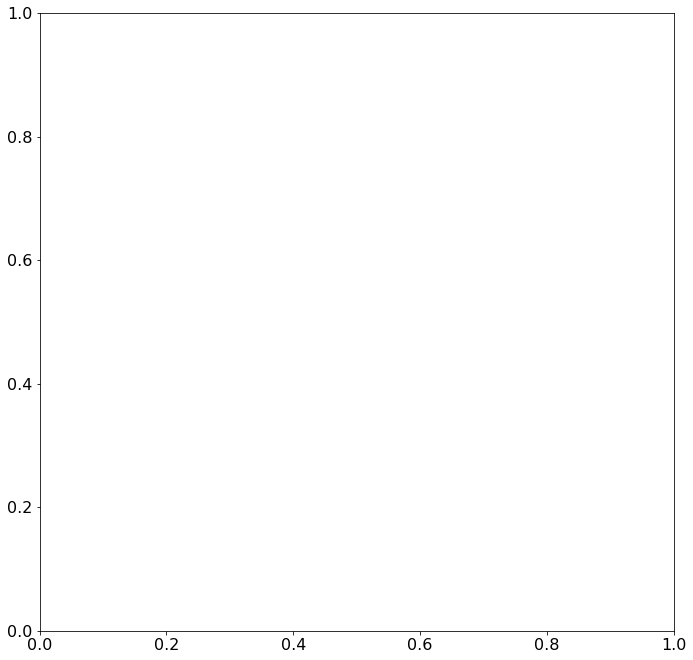

In [236]:
a=[]
b=[]
c=[]
for i in range(len(dc_lines)):
    sp=dc_lines.iloc[i].geometry.split('(')[1].split(')')[0].split(',')
    for j in range(len(sp)):
        a.append(sp[j].split(' ')[0])
        b.append(sp[j].split(' ')[1])
        c.append(dc_lines.url_name[i])
fix=pd.DataFrame({'a':a,'b':b,'c':c})
fix['a']=fix['a'].astype(float)
fix['b']=fix['b'].astype(float)
plt.figure(figsize=(25, 25))
plt.subplot(2, 2, 1) 
ax=sns.scatterplot(a="a", b="b", hue="c",data=fix)
plt.legend(loc=0, bbox_to_anchor=(1.05,0.6))
plt.title("Washington D.C. Rail Lines",size=35)
ax.get_legend().remove()
ax.set(xlabel='Longitude', ylabel='LATITUDE')
plt.subplot(2,2,2)
(dc_lines.groupby(['url_name'])['length'].sum()/1000).sort_values(ascending= False)[:10].sort_values().plot.barh()
plt.ylabel(' ')
plt.xlabel('length(km)')
plt.title("Top 10 Tracks by Length",size=35)

plt.tight_layout();